In [1]:
import numpy as np
import pickle
from sklearn.datasets import load_diabetes
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ncart import NCARRegressor
import torch

In [2]:
data = load_diabetes()  
X = data.data.astype(np.float32)
y = data.target
feature_names = data.feature_names

In [3]:
# model = NCARRegressor(epochs=100, n_trees=8, n_layers=2, n_selected=6, use_gpu=False)  # CPU
model = NCARRegressor(epochs=5000, n_trees=8, n_layers=2, n_selected=6)  # single GPU
# model = NCARRegressor(epochs=100, n_trees=8, n_layers=2, n_selected=6, data_parallel=True, gpu_ids=[0, 1])  # multiple GPU
model.fit(X, y)

On Device:  cuda:0
Epoch 0: Train Loss 29619.193359
Epoch 1: Train Loss 29612.552734
Epoch 2: Train Loss 29605.921875
Epoch 3: Train Loss 29599.320312
Epoch 4: Train Loss 29592.675781
Epoch 5: Train Loss 29586.037109
Epoch 6: Train Loss 29579.396484
Epoch 7: Train Loss 29572.783203
Epoch 8: Train Loss 29566.201172
Epoch 9: Train Loss 29559.628906
Epoch 10: Train Loss 29553.050781
Epoch 11: Train Loss 29546.439453
Epoch 12: Train Loss 29539.816406
Epoch 13: Train Loss 29533.195312
Epoch 14: Train Loss 29526.562500
Epoch 15: Train Loss 29519.978516
Epoch 16: Train Loss 29513.435547
Epoch 17: Train Loss 29506.896484
Epoch 18: Train Loss 29500.380859
Epoch 19: Train Loss 29493.929688
Epoch 20: Train Loss 29487.533203
Epoch 21: Train Loss 29481.167969
Epoch 22: Train Loss 29474.839844
Epoch 23: Train Loss 29468.548828
Epoch 24: Train Loss 29462.279297
Epoch 25: Train Loss 29456.023438
Epoch 26: Train Loss 29449.779297
Epoch 27: Train Loss 29443.552734
Epoch 28: Train Loss 29437.322266
Epoch

([29619.193359375,
  29612.552734375,
  29605.921875,
  29599.3203125,
  29592.67578125,
  29586.037109375,
  29579.396484375,
  29572.783203125,
  29566.201171875,
  29559.62890625,
  29553.05078125,
  29546.439453125,
  29539.81640625,
  29533.1953125,
  29526.5625,
  29519.978515625,
  29513.435546875,
  29506.896484375,
  29500.380859375,
  29493.9296875,
  29487.533203125,
  29481.16796875,
  29474.83984375,
  29468.548828125,
  29462.279296875,
  29456.0234375,
  29449.779296875,
  29443.552734375,
  29437.322265625,
  29431.08203125,
  29424.861328125,
  29418.650390625,
  29412.453125,
  29406.259765625,
  29400.072265625,
  29393.8828125,
  29387.73046875,
  29381.58984375,
  29375.439453125,
  29369.287109375,
  29363.123046875,
  29356.96484375,
  29350.822265625,
  29344.67578125,
  29338.5234375,
  29332.373046875,
  29326.224609375,
  29320.072265625,
  29313.912109375,
  29307.748046875,
  29301.55859375,
  29295.353515625,
  29289.13671875,
  29282.904296875,
  29276.65

In [4]:
importance = model.get_importance()

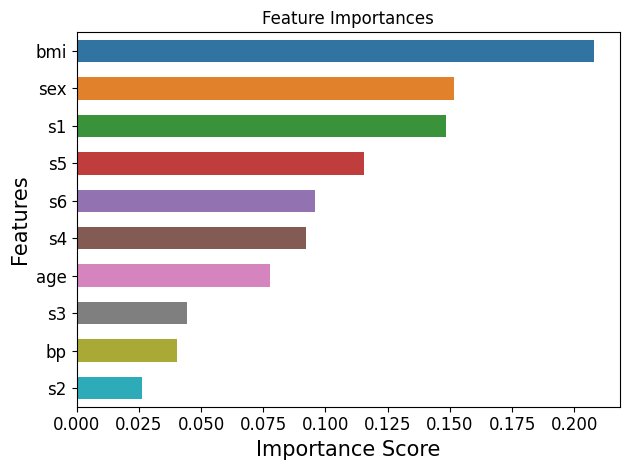

In [5]:
# Create a DataFrame with feature names and importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances using Seaborn
plt.figure()
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, width=0.6)
plt.title('Feature Importances', fontsize=12)
plt.xlabel('Importance Score', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.show()

In [6]:
model.predict(X)

array([[262.82455],
       [248.82727],
       [248.83206],
       [305.404  ],
       [265.68103],
       [248.83026],
       [248.83194],
       [248.83195],
       [297.95062],
       [305.25763],
       [264.45493],
       [248.83202],
       [296.5569 ],
       [278.78394],
       [295.3724 ],
       [255.02237],
       [248.83206],
       [248.83202],
       [248.83202],
       [248.83202],
       [248.83195],
       [248.83179],
       [248.83202],
       [305.42404],
       [263.29102],
       [305.4367 ],
       [248.83202],
       [258.29572],
       [248.83206],
       [292.50424],
       [278.93588],
       [248.83185],
       [305.4515 ],
       [248.83067],
       [248.83179],
       [248.83197],
       [305.3373 ],
       [304.8948 ],
       [299.33502],
       [248.83202],
       [248.82883],
       [248.83075],
       [248.83191],
       [248.7796 ],
       [304.9568 ],
       [248.83195],
       [305.45132],
       [302.2906 ],
       [248.83182],
       [278.31335],
